# Linear Regression

In [2]:
# import necessary libraries

import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# import data 

avocado = pd.read_csv('avocado.csv')

In [5]:
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
avocado.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [7]:
avocado = avocado.drop('Unnamed: 0',axis=1)

In [8]:
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


<AxesSubplot:xlabel='Date', ylabel='AveragePrice'>

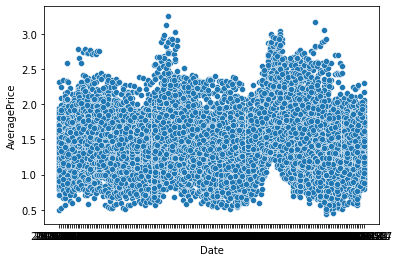

In [9]:
sns.scatterplot(data=avocado,x='Date',y='AveragePrice')

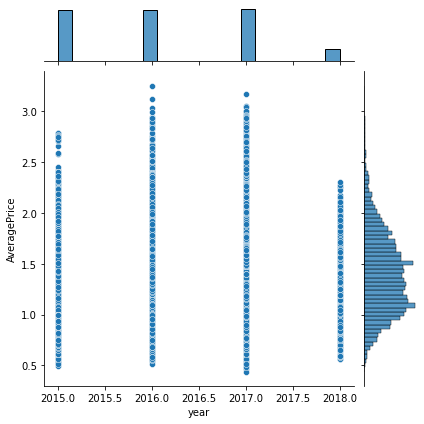

In [10]:
sns.jointplot(data=avocado,x='year',y='AveragePrice')

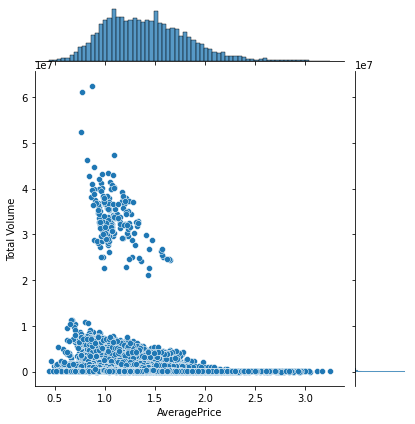

In [11]:
sns.jointplot(data=avocado,x='AveragePrice',y='Total Volume')

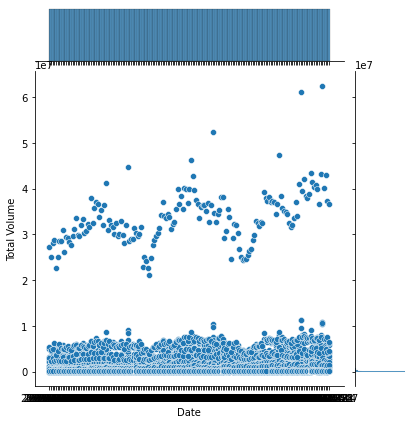

In [15]:
sns.jointplot(data=avocado,x='Date',y='Total Volume')

In [42]:
# Let's remove all values below 1.5 e7 since those seem to be ruining our model

avocado = avocado.drop(avocado[avocado['Total Volume']<15000000].index)
avocado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 2652 to 9101
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          169 non-null    object 
 1   AveragePrice  169 non-null    float64
 2   Total Volume  169 non-null    float64
 3   4046          169 non-null    float64
 4   4225          169 non-null    float64
 5   4770          169 non-null    float64
 6   Total Bags    169 non-null    float64
 7   Small Bags    169 non-null    float64
 8   Large Bags    169 non-null    float64
 9   XLarge Bags   169 non-null    float64
 10  type          169 non-null    object 
 11  year          169 non-null    int64  
 12  region        169 non-null    object 
dtypes: float64(9), int64(1), object(3)
memory usage: 18.5+ KB


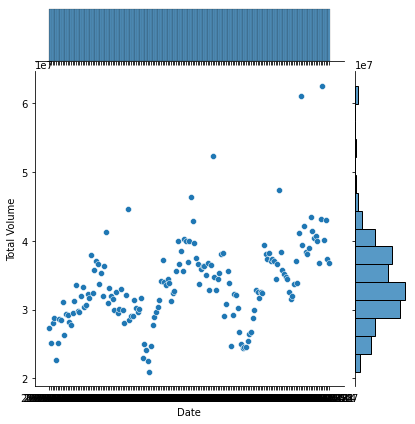

In [43]:
sns.jointplot(data=avocado,x='Date',y='Total Volume')

<AxesSubplot:xlabel='Date', ylabel='Total Volume'>

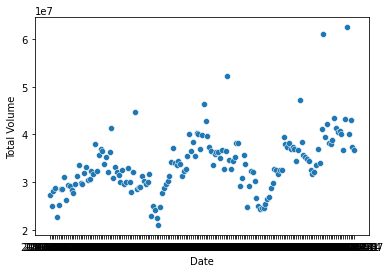

In [44]:
sns.scatterplot(data=avocado,x='Date',y='Total Volume')

## Training and Testing Data

In [47]:
avocado.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [48]:
y = avocado['Total Volume']

In [57]:
X = avocado[['AveragePrice', '4046', '4225', '4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']]

In [58]:
# import sklearn

from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [60]:
# Training the Model

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
# create an instance of LinearRegression

lm = LinearRegression()

In [66]:
# train and fit model on the training data

lm.fit(X_train,y_train)

LinearRegression()

In [67]:
# print out coeffiecients of the model

lm.coef_

array([-9.19224700e-01,  9.99999986e-01,  1.00000001e+00,  9.99999785e-01,
       -5.51508469e+06,  5.51508569e+06,  5.51508569e+06,  5.51508569e+06,
        2.88256625e-01])

# Predicting Test Data

In [68]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Values')

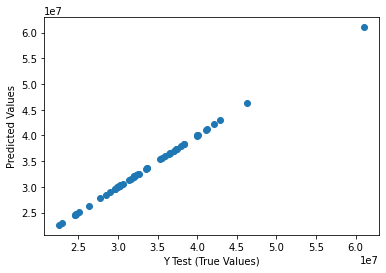

In [69]:
plt.scatter(y_test, predictions)
plt.xlabel("Y Test (True Values)")
plt.ylabel("Predicted Values")

# Evaluating the Model

In [70]:
from sklearn import metrics

In [71]:
print('MAE ', metrics.mean_absolute_error(y_test,predictions))
print('MSE ', metrics.mean_squared_error(y_test,predictions))
print('RMSE ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE  0.1486293001502168
MSE  0.04000465089719377
RMSE  0.20001162690502214


In [72]:
metrics.explained_variance_score(y_test,predictions)

0.9999999999999993

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

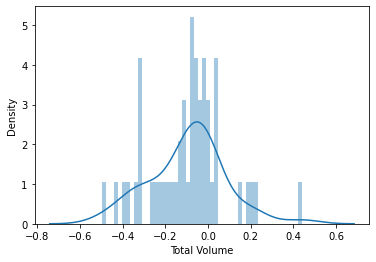

In [73]:
sns.distplot((y_test-predictions), bins = 50)

# Conclusion

In [75]:
# calculate the coefficient matrix

cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cdf

,Coeff
AveragePrice,-9.192247e-01
4046,1.000000e+00
4225,1.000000e+00
4770,9.999998e-01
Total Bags,-5.515085e+06
Small Bags,5.515086e+06
Large Bags,5.515086e+06
XLarge Bags,5.515086e+06
year,2.882566e-01


# End